# PyGfx cube example

**Note that this example depends on pygfx (`pip install -U pygfx`).**

An example showing a lit, textured, rotating cube. Tested against pygfx v0.1.15.

RFBOutputContext()

JupyterWgpuCanvas()
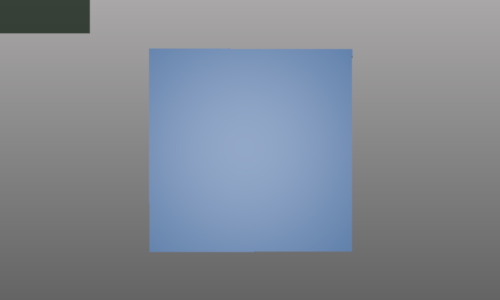

In [1]:
import pygfx as gfx
import pylinalg as la

cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)


def animate():
    rot = la.quat_from_euler((0.005, 0.01), order="XY")
    cube.local.rotation = la.quat_mul(rot, cube.local.rotation)


disp = gfx.Display()
disp.before_render = animate
disp.stats = True
disp.show(cube)